Folder with information and data can be found here: https://drive.google.com/drive/folders/11FoXpr5D7klvTGmSRIYl6jDK9rbq1QDc?usp=sharing . Let me know if you still cannot access it.

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [3]:
mosquitodata = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/mosquito counting - Sheet1.csv')
env_data = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/Rio de Janeiro_raw - Página1 (1).csv')
tot = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/Rio de Janeiro_raw - personal projected immediate timeline (3).csv')
total_envdata = pd.read_csv('/content/drive/MyDrive/SPRING - AZ/systems bio/final project data/Rio de Janeiro_raw - edited (2).csv')

In [4]:
results = tot['mosquitoes found']
results_train = results[:4] #training set
results_test = results[4:6] #test set

In [5]:
print(len(env_data['Day']))

44


In [6]:
 
best = -1000
bestk = 0
best_potential = 0
x_vals_train = []
x_vals_test = []
for i in range(len(results_train)):
  train = []
  train.append(tot['avg temp'][i])
  train.append(tot['avg precip'][i])
  train.append(tot['avg humidity'][i])
  x_vals_train.append(train)

for i in range(len(results_test)):
  train = []
  train.append(tot['avg temp'][i + len(results_train)])
  train.append(tot['avg precip'][i + len(results_train)])
  train.append(tot['avg humidity'][i + len(results_train)])
  x_vals_test.append(train)

rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_vals_train, results_train) #fit into a linear SVM

base = rbf_svc.coef_
tempa = 0
precipb = 0
humc = 0
for i in range(len(base)):
  tempa += base[i][0]
  precipb += base[i][1]
  humc += base[i][2]
baselst = [round(tempa/len(base),2), round(precipb/len(base),2), round(humc/len(base),2)]

print("Projected coefficient values (Temp, Precip, Humidity) are --from the training set: ", baselst)
print("Stock coefficient values (Temp, Precip, Humidity) are: ", base)
potential = rbf_svc.predict(x_vals_train) #predict future values
score = round(metrics.r2_score(results_train, potential), 2) #score accuracy
print("R2 score on the training set is: ", score)

potential = rbf_svc.predict(x_vals_test) #predict future values
score = round(metrics.r2_score(results_test, potential), 2) #score accuracy
print("R2 score on the test set is: ", score)

Projected coefficient values (Temp, Precip, Humidity) are --from the training set:  [0.05, 0.01, 0.13]
Stock coefficient values (Temp, Precip, Humidity) are:  [[-0.03225806  0.0483871   0.11290323]
 [ 0.11764706  0.          0.47058824]
 [ 0.01457195  0.02550091  0.08014572]
 [ 0.0621118  -0.07453416 -0.1242236 ]
 [ 0.12403101  0.01550388  0.12403101]
 [ 0.01570681  0.03664921  0.09424084]]
R2 score on the training set is:  1.0
R2 score on the test set is:  0.85


In [7]:
potential

array([33., 60.])

In [8]:
results_test #test results

4    30.0
5    71.0
Name: mosquitoes found, dtype: float64

In [9]:
metrics.mean_squared_error(results_test, potential)

65.0

## Creating simulation of place in Rio

## TEMPLATE

In [10]:

mosquito_count = []
zeros = []
class TrafficSimulation:

    def __init__(self, length=10, humans_density=0.2, height = 10, mosquito_num = 40, inc_rate = 1.7, kill_rate = 0.5):
        global mosquito_count, zeros
        '''
        Creating a new human/mosquito simulation

        Inputs:

            length (int) Length of automata (non-continuous). Default: 10.

            height (int) Height of automata. Default: 10. 
            
            human_density (float) The density of human population (non-moving) in the simulation (non-changing). Default: 0.2.

            mosquito_num (int) Number of initial mosquitoes in the simulation

            inc_rate (float) Made up value demonstrating the growth rate of the mosquito (roughly)

            kill_rate (float) Approximate kill rate from the norm by humans nearby

        The main bug to resolve is that in new steps, when a diagonal border goes from 0 to 1, it mocks the human borders. 
        I would need to patch the bug for future outputs.
        '''
        self.height = height #height
        self.length = length #length
        self.humans = humans_density #doesn't move
        self.mosquito_num = mosquito_num
        self.kill_rate = kill_rate
        self.state = - np.ones(self.length*self.height, dtype=int)  
        self.inc_rate = inc_rate
        random_indexes = np.random.choice(
            range(self.length * self.height), #change to include num of lanes
            size=int(round(self.humans * len(self.state))),
            replace=False)
        #2 lanes
        
        self.random_indexes = random_indexes.copy()
        self.state[random_indexes] = 0
        startinglst = []
        for i in range(self.mosquito_num):
          startinglst.append(random.randrange(1, len(self.state)))
        #print(startinglst)
        startinglst = sorted(startinglst)
        zeroes = 0
        self.zero_lst = []
        for i in range(len(self.state)):
          for j in range(len(startinglst)): #adding num of mosquitoes to space
            if self.state[i] != 0:
              if self.state[i] == -1:
                if i == startinglst[j]:
                  self.state[i] = 1
              else:
                if i == startinglst[j]:
                  self.state[i] += 1

          if self.state[i] == 0:
            self.zero_lst.append(i)
            zeroes += 1
        zeros.append(zeroes)


        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.time_step = 0



    def step(self, display=True):
        '''
        New step in the simulation
        '''
        
        for i in range(len(self.state)-1):
            genval = False
            num = False
            for j in range(len(self.zero_lst)):
              if self.state[i] == self.zero_lst[j]:
                self.state[i] = 0
                num = True
            if self.state[i] == 0 and num == False:
              self.state[i] = -1 #updating values to zeros 

            if self.state[i] > 0: #if mosquitoes, count number of human neighbors
              counter = 0 #EXAMPLE (PATTERN CONTINUES FOR EACH DIRECTION)
              genval = True
              if (i % self.length) - 1 > 0: #IF CONDITION (DOESN'T HIT WALL)
                  if self.state[i - 1] == 0: #IF HUMAN NEAR, GETS HIT BY PESTICIDE
                    counter += 1
                  elif self.state[i] > 1: #IF NOT NEAR, POTENTIALLY MOVING A BIT IN A GIVEN DIRECTION
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-1] != 0:
                        self.state[i-1] += val #admittedly this is a bit buggy, would need to be updated for publication
                        self.state[i] -= val

              if (i % self.length) + 1 > 0:
                if self.state[i + 1] == 0:
                  counter += 1
                elif self.state[i] > 1:
                  val = int(np.ceil(self.state[i]/2))
                  if random.random() > 0.5:
                    if self.state[i+1] != 0:
                      self.state[i+1] += val
                      self.state[i] -= val

              
              if i > self.length:
                if (i % self.length) - 1 > 0:
                  if self.state[i - 1 - self.length] == 0:
                    counter += 1
                  elif self.state[i] > 1:
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-1-self.length] != 0:
                        self.state[i-1-self.length] += val
                        self.state[i] -= val

                if (i % self.length) + 1 > 0:
                  if self.state[i + 1 - self.length] == 0:
                    counter += 1
                  elif self.state[i] > 1:
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-self.length+1] != 0:
                        self.state[i-self.length+1] += val
                        self.state[i] -= val
                if self.state[i - self.length] == 0:
                  counter += 1
                if self.state[i-self.length] > 0 and self.state[i] > 1:
                  val = int(np.ceil(self.state[i]/2))
                  if random.random() > 0.5:
                    if self.state[i-self.length] != 0:
                      self.state[i-self.length] += val
                      self.state[i] -= val
              
              if i + self.length < len(self.state):
                if (i % self.length) - 1 > 0:
                  if self.state[i - 1 + self.length] == 0:
                    counter += 1
                  else:
                    val = int(np.ceil(self.state[i]/2))
                    if self.state[i] > 1 and random.random() > 0.5:
                      if self.state[i+self.length-1] != 0:
                        self.state[i - 1 + self.length] += val
                        self.state[i] -= val

                if ((i+ 1) % self.length)  > 0 and i + 1 != len(self.state):
                  if self.state[i + 1 + self.length] == 0:
                    counter += 1
                  else:
                    val = int(np.ceil(self.state[i]/2))
                    if self.state[i] > 1 and random.random() > 0.5:
                      if self.state[i+self.length+1] != 0:
                        self.state[i + 1 + self.length] += val
                        self.state[i] -= val
                if self.state[i + self.length] == 0:
                  counter += 1
                if self.state[i + self.length] != 0:
                  val = int(np.ceil(self.state[i]/2))
                  if self.state[i] > 1 and random.random() > 0.5:
                    if self.state[i+self.length-1] != 0:
                      self.state[i + self.length] += val
                      self.state[i] -= val



              self.state[i] = int(np.ceil(self.state[i] * self.inc_rate)) #add new population per day
              for j in range(counter):
                self.state[i] = int(self.state[i] * self.kill_rate) #killed by pesticide
              if self.state[i] == 0: #if old mosquito
                self.state[i] = 1
              if self.state[i] > 9:
                self.state[i] = 9
                print("WARNING: Maximum Density for Mosquitoes reached at one point")
            if genval == True and self.state[i] <= 0:
              self.state[i] = -1 #trying to eliminate bugs
              

            baseval = False
            for k in range(len(self.zero_lst)):
              if i == self.zero_lst[k]:
                baseval = True
                self.state[i]= 0
            if baseval == False and self.state[i]==0:
              self.state[i] = -1
        if display:
            self.display()

        # Update time and traffic flow
        self.time_step += 1


    def display(self):
        global mosquito_count, zeros
        '''
        Print out the current state of the simulation. 
        '''
        print("___________________________________________________________________________________________________________")
        lst = []
        zcount = 0
        mcount = 0
        for i in range(len(self.state)):
          if i > 1 and i % self.length == 1:
            lst.append(i)
          if self.state[i] > 0:
            mcount += self.state[i]
          val = False
          for j in range(len(self.zero_lst)):
            if i == self.zero_lst[j]:
              val = True
          if val == False and self.state[i] == 0:
            self.state[i] = -1
          if self.state[i] == 0:
            zcount += 1
        mosquito_count.append(mcount)
        zeros.append(zcount)
        for i in range(len(lst)):
          if i == 0:
            print(''.join('.' if x == -1 else str(x) for x in self.state[:lst[i]])) #lane 1
          elif i + 1 != len(lst):
            print(''.join('.' if x == -1 else str(x) for x in self.state[lst[i-1]:lst[i]])) #lane x
        print("___________________________________________________________________________________________________________")

In [25]:
simulate = TrafficSimulation(humans_density = 0.2)
simulate.display()
for i in range(50):
    simulate.step()

___________________________________________________________________________________________________________
.1.21..10..
..0.001..1
..100.1.1.
0....0...1
0112..01..
020...0..0
0..1...01.
...1...011
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
.3.11..10..
..0.001..1
..100.1.3.
0....0...1
0121..01..
010...0..0
0..1...01.
...1...013
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
.3111..10..
..0.001..1
..100.1.31
0....0...1
0211..01..
010...0..0
0..1...01.
...1...013
___________________________________________________________________________________________________________
_____________________________________________________________________________________

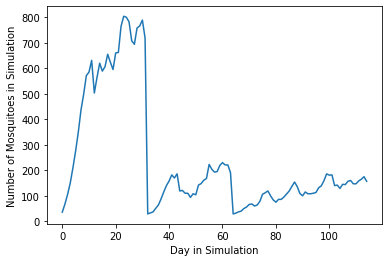

In [26]:
plt.plot(mosquito_count)
plt.xlabel("Day in Simulation")
plt.ylabel("Number of Mosquitoes in Simulation")
plt.show()

## Adding Environmental Data

These results are weakened by the idea that we are not detecting changes in the previous data-- which is a distinction we'll need to distinguish in future generations of the model. This is just an example.

In [13]:
temp = total_envdata['Temp Comp Media']
temp = temp.dropna()
temp = temp.reset_index()

hum = total_envdata['Umidade Relativa Media']
hum = hum.dropna()
hum = hum.reset_index()

precip = total_envdata['total_precip']
precip = precip.dropna()
precip = precip.reset_index()

In new version, I will switch the growth rate for the combo of the temp

Stock coefficient values (Temp, Precip, Humidity) are:  [[-0.03225806  0.0483871   0.11290323]

In [20]:
mosquito_count = []
zeros = []
class TrafficSimulation:

    def __init__(self, length=10, humans_density=0.2, height = 10, mosquito_num = 40, inc_scale = 0.33, kill_rate = 0.5, temp_constant = -0.03, hum_constant = 0.11, precip_c = 0.05):
        global mosquito_count, zeros, hum, temp, precip
        '''
        Creating a new human/mosquito simulation

        Inputs:

            length (int) Length of automata (non-continuous). Default: 10.

            height (int) Height of automata. Default: 10. 
            
            human_density (float) The density of human population (non-moving) in the simulation (non-changing). Default: 0.2.

            mosquito_num (int) Number of initial mosquitoes in the simulation

            inc_scate (float) Made up multiplier value demonstrating the growth rate of the mosquito (roughly)

            kill_rate (float) Approximate kill rate from the norm by humans nearby

            env_constants (from data (floats)): coefficient values for line of best fit

        The main bug to resolve is that in new steps, when a diagonal border goes from 0 to 1, it mocks the human borders. 
        I would need to patch the bug for future outputs.
        '''
        self.height = height #height
        self.length = length #length
        self.humans = humans_density #doesn't move
        self.mosquito_num = mosquito_num
        self.kill_rate = kill_rate
        self.state = - np.ones(self.length*self.height, dtype=int)  
        self.inc_rate = inc_scale
        self.hrate = hum_constant
        self.trate = temp_constant
        self.prate = precip_c

        random_indexes = np.random.choice(
            range(self.length * self.height), #change to include num of lanes
            size=int(round(self.humans * len(self.state))),
            replace=False)
        #2 lanes
        
        self.random_indexes = random_indexes.copy()
        self.state[random_indexes] = 0
        startinglst = []
        for i in range(self.mosquito_num):
          startinglst.append(random.randrange(1, len(self.state)))
        #print(startinglst)
        startinglst = sorted(startinglst)
        zeroes = 0
        self.zero_lst = []
        for i in range(len(self.state)):
          for j in range(len(startinglst)): #adding num of mosquitoes to space
            if self.state[i] != 0:
              if self.state[i] == -1:
                if i == startinglst[j]:
                  self.state[i] = 1
              else:
                if i == startinglst[j]:
                  self.state[i] += 1

          if self.state[i] == 0:
            self.zero_lst.append(i)
            zeroes += 1
        zeros.append(zeroes)


        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.time_step = 0



    def step(self, display=True):
        global hum, temp, precip
        '''
        New step in the simulation
        '''
        
        for i in range(len(self.state)-1):
            genval = False
            num = False
            for j in range(len(self.zero_lst)):
              if self.state[i] == self.zero_lst[j]:
                self.state[i] = 0
                num = True
            if self.state[i] == 0 and num == False:
              self.state[i] = -1 #updating values to zeros 

            if self.state[i] > 0: #if mosquitoes, count number of human neighbors
              counter = 0 #EXAMPLE (PATTERN CONTINUES FOR EACH DIRECTION)
              genval = True
              if (i % self.length) - 1 > 0: #IF CONDITION (DOESN'T HIT WALL)
                  if self.state[i - 1] == 0: #IF HUMAN NEAR, GETS HIT BY PESTICIDE
                    counter += 1
                  elif self.state[i] > 1: #IF NOT NEAR, POTENTIALLY MOVING A BIT IN A GIVEN DIRECTION
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-1] != 0:
                        self.state[i-1] += val #admittedly this is a bit buggy, would need to be updated for publication
                        self.state[i] -= val

              if (i % self.length) + 1 > 0:
                if self.state[i + 1] == 0:
                  counter += 1
                elif self.state[i] > 1:
                  val = int(np.ceil(self.state[i]/2))
                  if random.random() > 0.5:
                    if self.state[i+1] != 0:
                      self.state[i+1] += val
                      self.state[i] -= val

              
              if i > self.length:
                if (i % self.length) - 1 > 0:
                  if self.state[i - 1 - self.length] == 0:
                    counter += 1
                  elif self.state[i] > 1:
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-1-self.length] != 0:
                        self.state[i-1-self.length] += val
                        self.state[i] -= val

                if (i % self.length) + 1 > 0:
                  if self.state[i + 1 - self.length] == 0:
                    counter += 1
                  elif self.state[i] > 1:
                    val = int(np.ceil(self.state[i]/2))
                    if random.random() > 0.5:
                      if self.state[i-self.length+1] != 0:
                        self.state[i-self.length+1] += val
                        self.state[i] -= val
                if self.state[i - self.length] == 0:
                  counter += 1
                if self.state[i-self.length] > 0 and self.state[i] > 1:
                  val = int(np.ceil(self.state[i]/2))
                  if random.random() > 0.5:
                    if self.state[i-self.length] != 0:
                      self.state[i-self.length] += val
                      self.state[i] -= val
              
              if i + self.length < len(self.state):
                if (i % self.length) - 1 > 0:
                  if self.state[i - 1 + self.length] == 0:
                    counter += 1
                  else:
                    val = int(np.ceil(self.state[i]/2))
                    if self.state[i] > 1 and random.random() > 0.5:
                      if self.state[i+self.length-1] != 0:
                        self.state[i - 1 + self.length] += val
                        self.state[i] -= val

                if ((i+ 1) % self.length)  > 0 and i + 1 != len(self.state):
                  if self.state[i + 1 + self.length] == 0:
                    counter += 1
                  else:
                    val = int(np.ceil(self.state[i]/2))
                    if self.state[i] > 1 and random.random() > 0.5:
                      if self.state[i+self.length+1] != 0:
                        self.state[i + 1 + self.length] += val
                        self.state[i] -= val
                if self.state[i + self.length] == 0:
                  counter += 1
                if self.state[i + self.length] != 0:
                  val = int(np.ceil(self.state[i]/2))
                  if self.state[i] > 1 and random.random() > 0.5:
                    if self.state[i+self.length-1] != 0:
                      self.state[i + self.length] += val
                      self.state[i] -= val



              growth_rate = self.inc_rate* (self.trate*temp['Temp Comp Media'][self.time_step] + self.hrate*hum['Umidade Relativa Media'][self.time_step] + self.prate*precip['total_precip'][self.time_step])

              self.state[i] = int(np.ceil(self.state[i] * growth_rate)) #add new population per day
              for j in range(counter):
                self.state[i] = int(self.state[i] * self.kill_rate) #killed by pesticide
              if self.state[i] == 0: #if old mosquito
                self.state[i] = 1
              if self.state[i] > 9:
                self.state[i] = 9
                print("WARNING: Maximum Density for Mosquitoes reached at one point")
            if genval == True and self.state[i] <= 0:
              self.state[i] = -1 #trying to eliminate bugs
              

            baseval = False
            for k in range(len(self.zero_lst)):
              if i == self.zero_lst[k]:
                baseval = True
                self.state[i]= 0
            if baseval == False and self.state[i]==0:
              self.state[i] = -1
        if display:
            self.display()

        # Update time and traffic flow
        self.time_step += 1


    def display(self):
        global mosquito_count, zeros
        '''
        Print out the current state of the simulation. 
        '''
        print("___________________________________________________________________________________________________________")
        lst = []
        zcount = 0
        mcount = 0
        for i in range(len(self.state)):
          if i > 1 and i % self.length == 1:
            lst.append(i)
          if self.state[i] > 0:
            mcount += self.state[i]
          val = False
          for j in range(len(self.zero_lst)):
            if i == self.zero_lst[j]:
              val = True
          if val == False and self.state[i] == 0:
            self.state[i] = -1
          if self.state[i] == 0:
            zcount += 1
        mosquito_count.append(mcount)
        zeros.append(zcount)
        for i in range(len(lst)):
          if i == 0:
            print(''.join('.' if x == -1 else str(x) for x in self.state[:lst[i]])) #lane 1
          elif i + 1 != len(lst):
            print(''.join('.' if x == -1 else str(x) for x in self.state[lst[i-1]:lst[i]])) #lane x
        print("___________________________________________________________________________________________________________")

In [23]:
print("May 2006 in Brazil")
simulate = TrafficSimulation(humans_density = 0.2)
simulate.display()
for i in range(31):
    simulate.step()

May 2006 in Brazil
___________________________________________________________________________________________________________
.......100.
..111.0...
..11......
131001.1..
030.1.1..1
0.1.0.10..
0..11..1..
.01...0.00
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
.......100.
..333.0...
..11......
121001.3..
010.1.1..1
0.1.0.10..
0..11..1..
.01...0.00
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________
.....1.100.
.133310...
..11......
12100113..
010.1.1..1
0.1.0.10..
0..11..1..
.01...0.00
___________________________________________________________________________________________________________
__________________________________________________________________

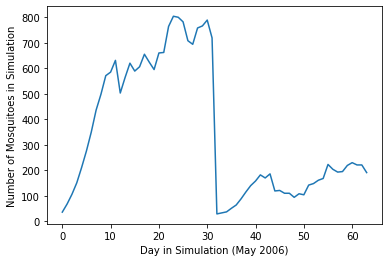

In [24]:
plt.plot(mosquito_count)
plt.xlabel("Day in Simulation (May 2006)")
plt.ylabel("Number of Mosquitoes in Simulation")
plt.show()